In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
batch1 = pickle.load(open(r'.\Data\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [3]:
numBat1 = len(batch1.keys())
numBat1

41

In [4]:
batch2 = pickle.load(open(r'.\Data\batch2.pkl','rb'))

In [5]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [6]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [7]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [8]:
numBat2 = len(batch2.keys())
numBat2

43

In [9]:
batch3 = pickle.load(open(r'.\Data\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

In [10]:
numBat3 = len(batch3.keys())
numBat3

40

In [11]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [12]:
bat_dict = {**batch1, **batch2, **batch3}

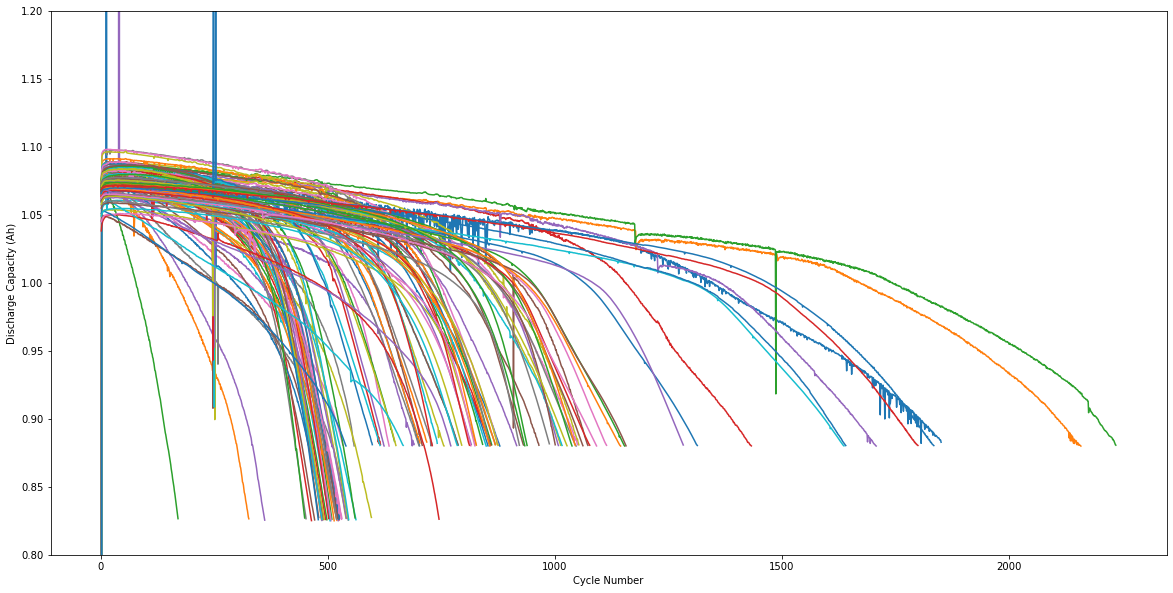

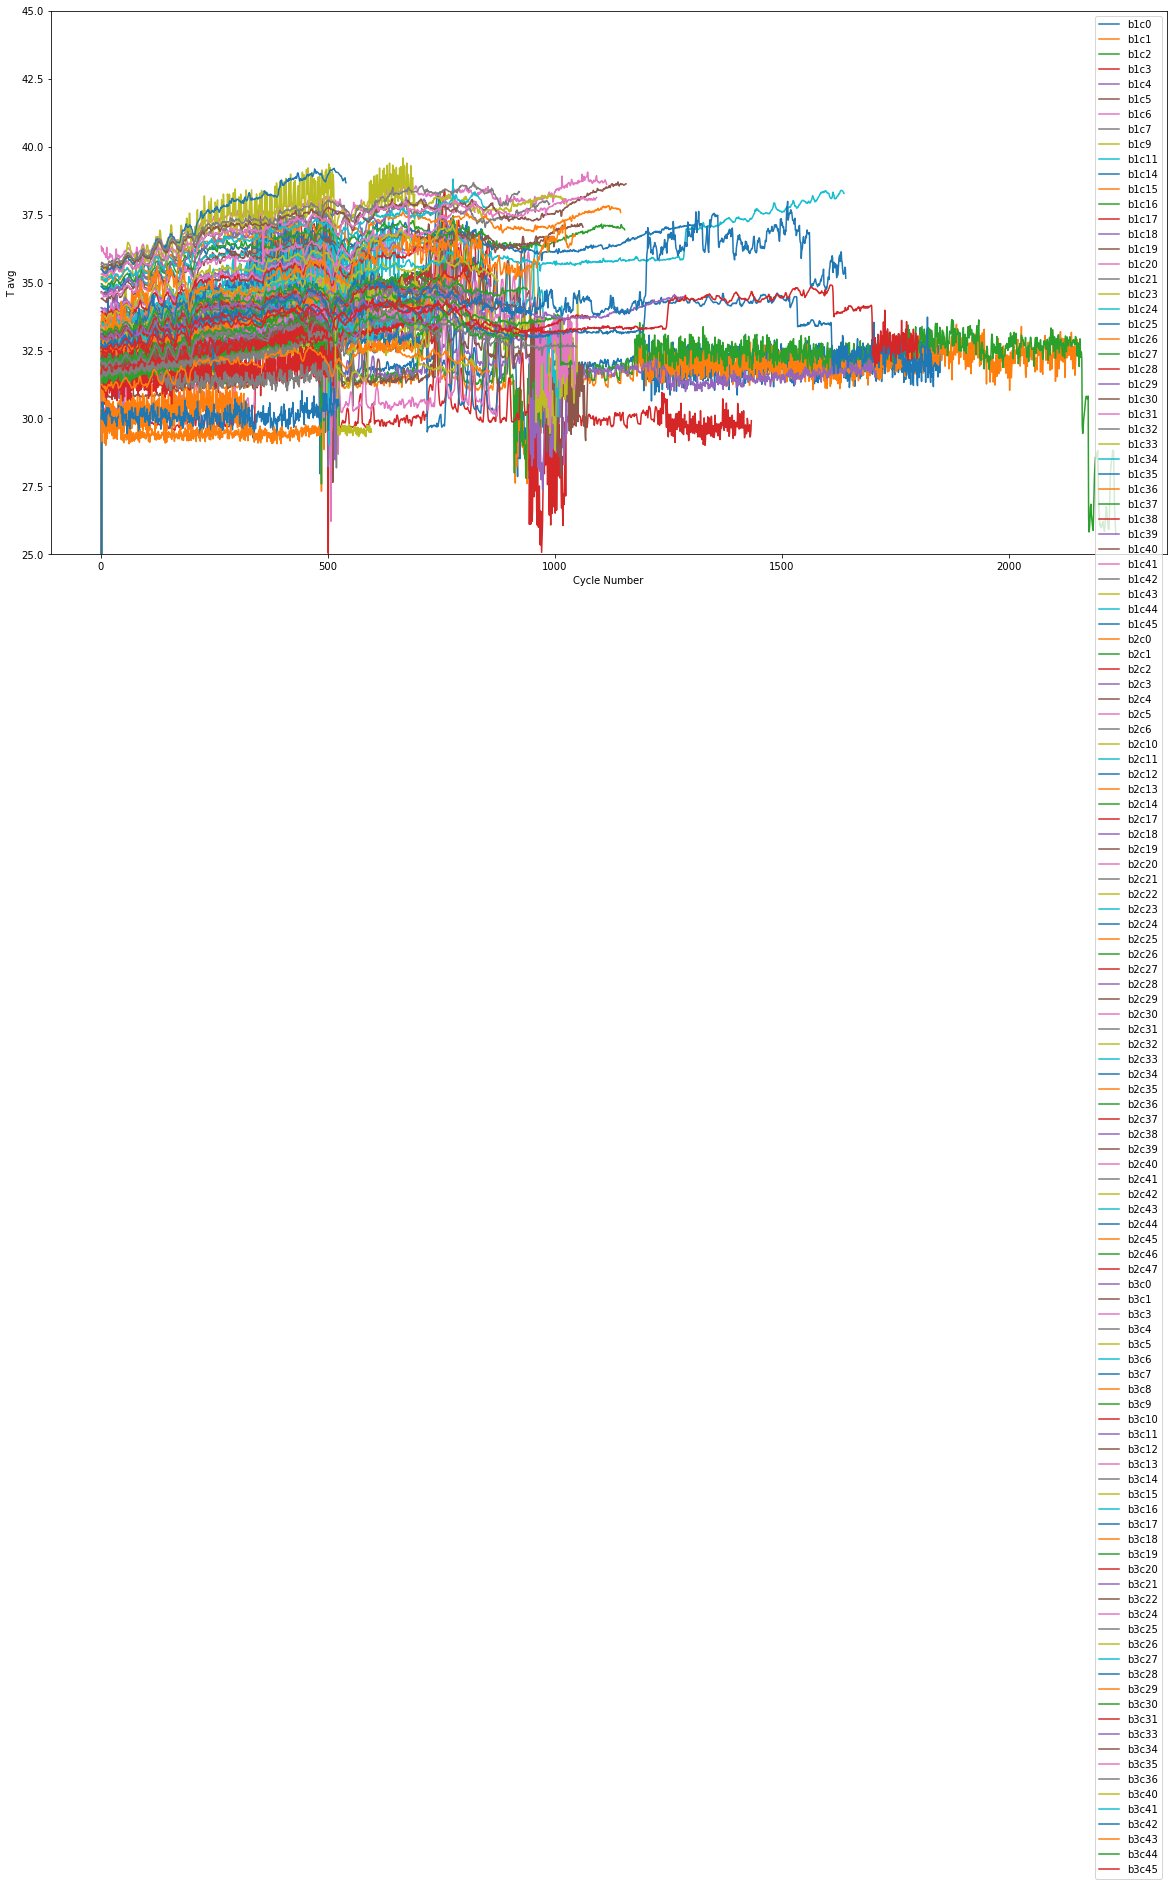

In [13]:
plt.figure(1,figsize=(20,10))
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])

plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.ylim((0.8,1.2))

plt.figure(2,figsize=(20,10))
for i in bat_dict.keys():    
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['Tavg'])
plt.xlabel('Cycle Number')
plt.ylabel('T avg')
plt.ylim((25,45))
plt.legend(bat_dict.keys())

Text(0.5, 1.0, 'Tavg of cycle no')

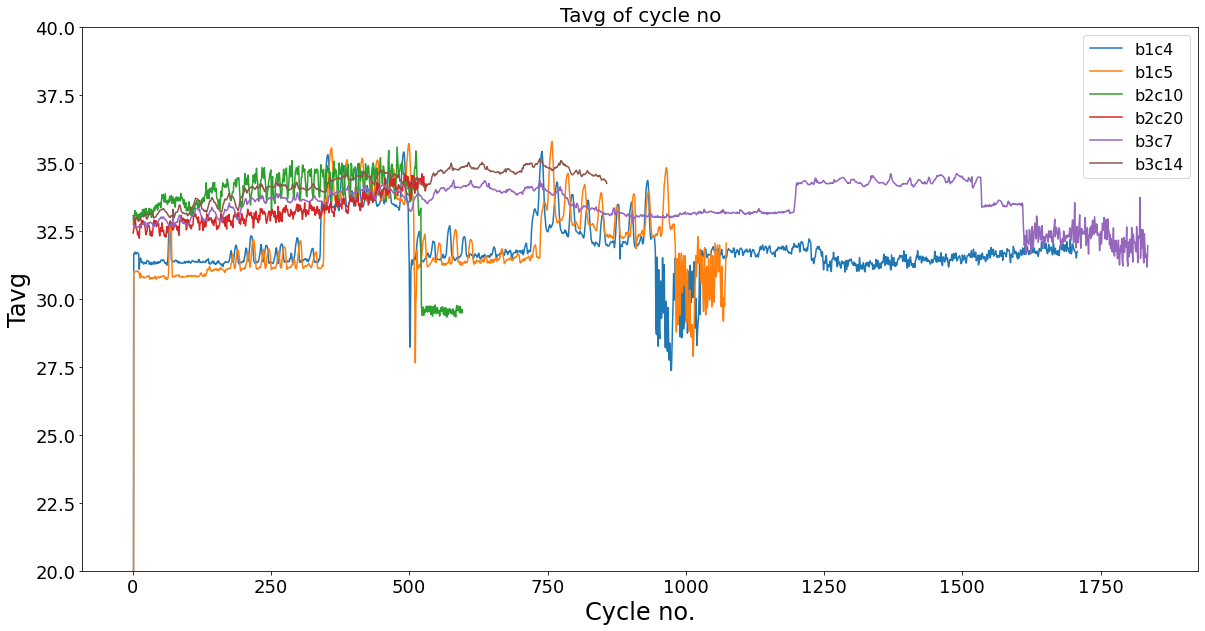

In [14]:
#Discharge Tavg
plt.figure(figsize=(20,10))

plt.plot(bat_dict['b1c4']['summary']['cycle'], bat_dict['b1c4']['summary']['Tavg'], label="b1c4")
plt.plot(bat_dict['b1c5']['summary']['cycle'], bat_dict['b1c5']['summary']['Tavg'], label="b1c5")
plt.plot(bat_dict['b2c10']['summary']['cycle'], bat_dict['b2c10']['summary']['Tavg'], label="b2c10")
plt.plot(bat_dict['b2c20']['summary']['cycle'], bat_dict['b2c20']['summary']['Tavg'], label="b2c20")
plt.plot(bat_dict['b3c7']['summary']['cycle'], bat_dict['b3c7']['summary']['Tavg'], label="b3c7")
plt.plot(bat_dict['b3c14']['summary']['cycle'], bat_dict['b3c14']['summary']['Tavg'], label="b3c14")
#plt.xlim(0.0, 0.7)
plt.ylim((20,40))
plt.legend(fontsize=16)
plt.ylabel('Tavg', fontsize=24)
plt.xlabel('Cycle no.', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Tavg of cycle no', fontsize=20)
#plt.savefig('Tavg.png', dpi=400)

### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [15]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);